# Model `OrMachine`

Make sure you've ormachine installed in your Python environment.

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1997
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


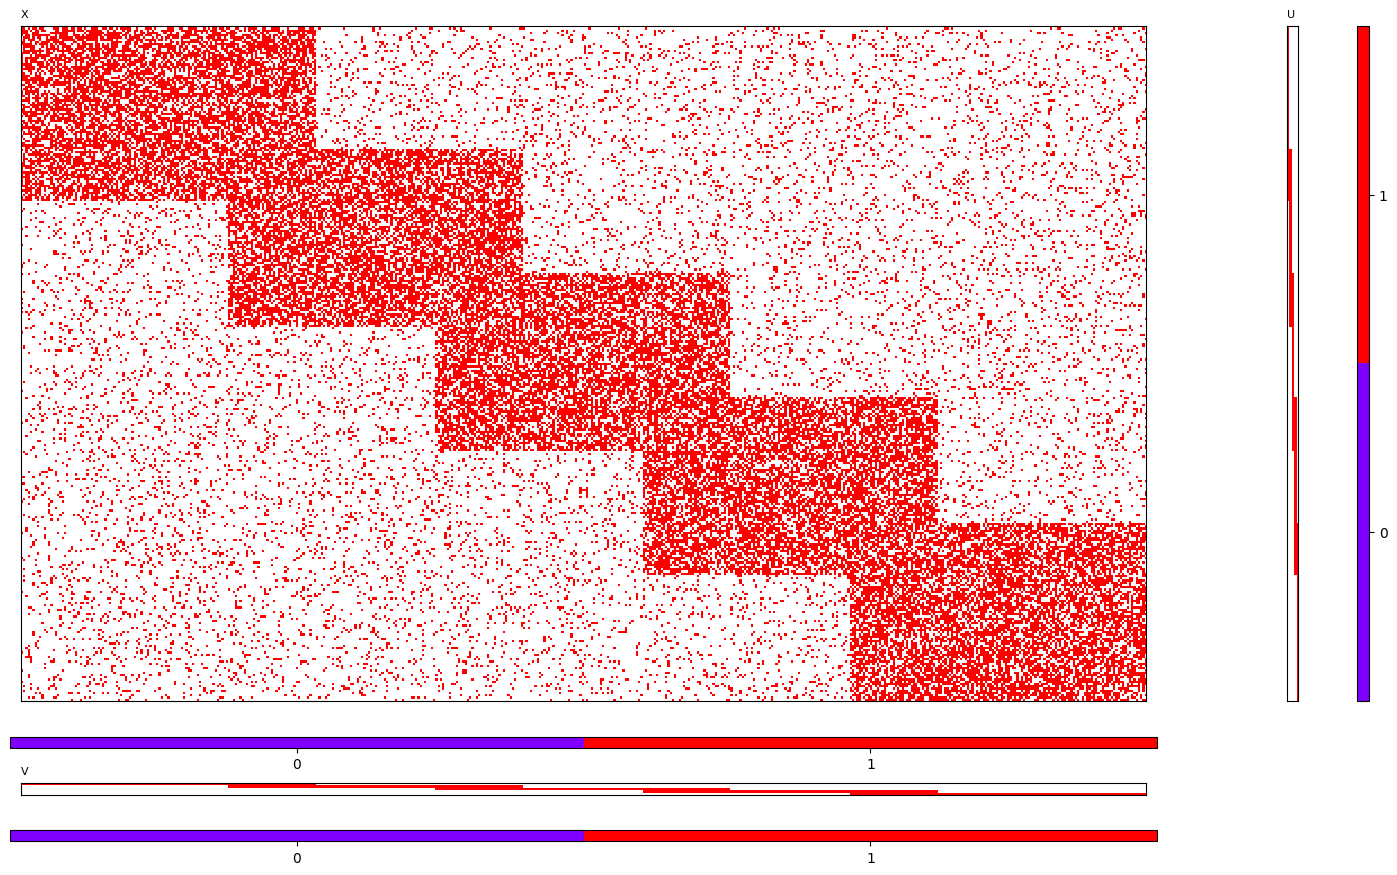

<Figure size 640x480 with 0 Axes>

In [2]:
# from generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.3])
# data.generate(seed=1997)

# data.add_noise(noise=[0.4, 0.1], seed=2000)
# data.show_matrix()

In [3]:
from datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


In [4]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

split = NoSplit(X=data.X)

# split.negative_sample(size=split.pos_size, type="popularity", seed=2023)

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1720554168
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1720554168


[I] k            : 100
[I] W            : mask
[I] prior_u      : 0.5
[I] prior_v      : 0.5
[I] channel_pos  : 0.99
[I] channel_neg  : 0.99
[I] tol          : 0.0001
[I] max_iter     : 500
[I] lr           : 0.2
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] verbose      : True
[I] Missing validation data.
[W] Missing testing data.
burning in markov chain...
	iteration: 115 recon acc.: 0.943
	converged at reconstr. accuracy: 0.943
allocating memory to save samples...
drawing samples...
	iteration 100; recon acc.: 0.944
finished.
[W] Timer not started.
[I] model saved as: 24-07-10_04-03-39_OrMachine.pickle


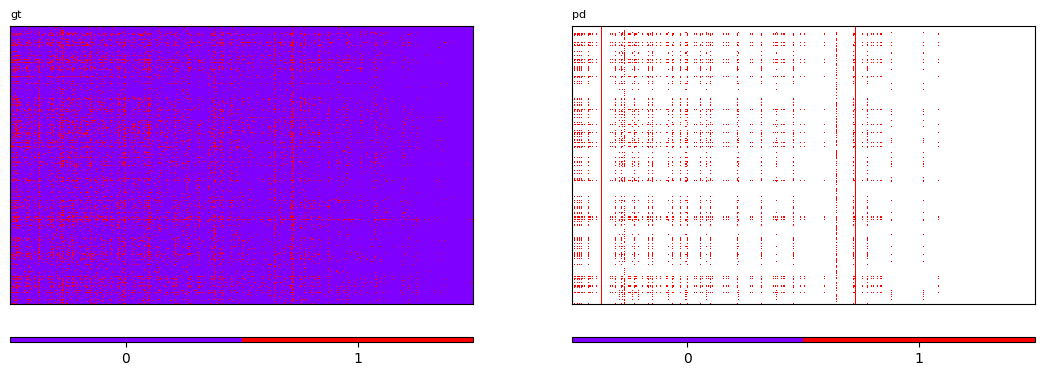

train                              
                             0                              
                time    Recall Precision  Accuracy        F1
0  10/07/24 04:03:39  0.350474  0.718863  0.943607  0.471213

<Figure size 640x480 with 0 Axes>

In [14]:
from models import OrMachine

k = 100
W = 'full'

model = OrMachine(k=k)
model.fit(X_train=X_train, task='reconstruction', verbose=True)

In [5]:
# import ormachine
# import numpy as np
# from utils import to_dense

# # generate toy data in {-1,1} domain
# # X = 2*np.array([[0,0,1,1,0,0],[1,1,0,0,0,0],[0,0,1,1,1,1]])-1
# # X = np.concatenate(200*[X])

# X = to_dense(X_train)
# X = 2 * X - 1

# k = 50

# # invoke machine object
# orm = ormachine.machine()
# data = orm.add_matrix(val=X, sampling_indicator=False)

# # add layer 
# layer1 = orm.add_layer(size=k, child=data, lbda_init=2)

# # run inference
# orm.infer()

# orm.__dict__

# from utils import show_matrix, matmul

# X_0 = orm.members[0].val

# U = orm.members[1].val
# U = (U + 1) / 2

# V = orm.members[2].val
# V = (V + 1) / 2

# # from utils import show_factor_distribution
# # show_factor_distribution(U=U, V=V, resolution=100)

# X_pd = matmul(U, V.T, boolean=True, sparse=True)

# show_matrix([(X_pd, [0, 0], 'pd'), (X_0, [1, 0], 'X_0'), (X_train, [2, 0], 'gt')], colorbar=True, discrete=False, keep_nan=False)

burning in markov chain...
	iteration: 130 recon acc.: 0.944
	converged at reconstr. accuracy: 0.944
allocating memory to save samples...
drawing samples...
	iteration 100; recon acc.: 0.945
finished.
